In [11]:
# importando as libraries
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [12]:
# Leitura dos dados e tratamento dos dados
caminho = '(...)/flat_table'
os.chdir(caminho)

# Leitura do treino
dados = pd.read_csv('flat_train.csv', sep = ';')
dados.head()

,PassengerId,Survived,Age,Fare,AGE_WOE,TICKET_WOE,SEX_WOE,SIBSP_WOE,PARCH_WOE,CABIN_WOE,EMBARKED_WOE,PCLASS_WOE
0,831,1,15,14.4542,1.077106,0.348307,1.504445,0.500417,-0.208506,-0.411306,0.817283,-0.775942
1,112,0,15,14.4542,1.077106,-1.000000,1.504445,0.500417,-0.208506,-0.411306,0.817283,-0.775942
2,40,1,14,11.2417,0.372049,1.000000,1.504445,0.500417,-0.208506,-0.411306,0.817283,-0.775942
3,621,0,27,14.4542,0.831591,0.348307,-0.973671,0.500417,-0.208506,-0.411306,0.817283,-0.775942
4,74,0,26,14.4542,-0.312728,-1.000000,-0.973671,0.500417,-0.208506,-0.411306,0.817283,-0.775942


In [13]:
# Separando as variaveis de entrada das variaveis de saida
dados.columns

# Dados de treino
y = dados["Survived"].values
X = dados[["Age","Fare","AGE_WOE","TICKET_WOE","SEX_WOE","SIBSP_WOE","PARCH_WOE","CABIN_WOE","EMBARKED_WOE","PCLASS_WOE"]]


In [14]:
# Separando os dados em treino e teste
acc_vec = []
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):

    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [16]:
# Ajustando o modelo
regLog = LogisticRegression()
regLog.fit(X_train, y_train)
y_fitted = regLog.predict(X_test)
    

D:\jean\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# Caluclo das metricas de performance
acc = accuracy_score(y_fitted, y_test)
acc_vec.append(acc)

In [19]:
# Usando uma funcao para repetir o processo n vezes
def kfold_method(X, y, k):
    
    acc_vec = []
    kf = KFold(n_splits=k, shuffle = True)
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        # Ajustando o modelo
        regLog = LogisticRegression()
        regLog.fit(X_train, y_train)
        y_fitted = regLog.predict(X_test)
        # Caluclo das metricas de performance
        acc = accuracy_score(y_fitted, y_test)
        acc_vec.append(acc)
    
    return acc_vec

In [20]:
# Repetindo o procedimento kfold n vezes]
acc_vec = []
for i in range(10):
    acc = kfold_method(X, y, 5)
    [acc_vec.append(i) for i in acc]

D:\jean\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\jean\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\jean\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\jean\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\jean\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\jean\An

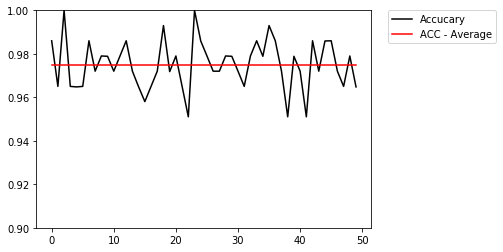

In [23]:
# Plotando o grafico de resultados
plt.plot(acc_vec, label = 'Accucary', color = 'black')
plt.plot([sum(acc_vec)/len(acc_vec) for i in range(len(acc_vec))], label = 'ACC - Average', color = 'red')
plt.ylim([0.9,1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()